Part 2

In [1]:
# Load the libraries needed
%matplotlib inline
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import time
import math

# Seed random number generator
np.random.seed(123)

# Helper functions for linear models
def linear ( X, coefficients ):
    return np.dot(X, np.transpose(coefficients), )

def fit_linear( X, y, features=None ):
    """ 
        Returns the coefficients of a linear model fit to X,y.
        If features is a list of integers, then fit will ignore
        any features whose index is not in the list.
        ( Returned coefficients for these features will be set
        to 0. )
    """
    if features is not None:
        # Make a mask
        tot_num_features = np.shape(X)[-1]
        mask = np.zeros((1,tot_num_features))
        mask[0,features] = 1.
        # Zero out all irrellevant features
        X = X * mask
    
    # Do linear least squares fit
    clf = LinearRegression(fit_intercept=False)
    clf.fit(X, y)
    return clf.coef_


def ridge_regression( X, y, lam=1.0, features=None ):
    """ 
        Identical to fit_linear, but performs ridge regression
        with weight penalty alpha (alternatively known as lambda)
    """
    if features is not None:
        # Make a mask
        tot_num_features = np.shape(X)[-1]
        mask = np.zeros((1,tot_num_features))
        mask[0,features] = 1.
        # Zero out all irrellevant features
        X = X * mask
    
    # Do ridge regression fit
    clf = Ridge(alpha=lam, fit_intercept=False)
    clf.fit(X, y)
    return clf.coef_

def lasso_regression( X, y, lam=1.0, features=None ):
    """ 
        Identical to fit_linear, but performs lasso regression
        with weight penalty alpha (alternatively known as lambda)
    """
    if features is not None:
        # Make a mask
        tot_num_features = np.shape(X)[-1]
        mask = np.zeros((1,tot_num_features))
        mask[0,features] = 1.
        # Zero out all irrellevant features
        X = X * mask
    
    # Do ridge regression fit
    clf = Lasso(alpha=lam, fit_intercept=False, max_iter=1e5)
    clf.fit(X, y)
    return clf.coef_


In [2]:
def mse_loss( X, y, learned_coefficients ):
    y_pred = linear(X,learned_coefficients)
    mse = np.mean(np.square(y_pred-y))
    return mse

Part 2 Assignment 1

In [3]:
#100 datapoints 

# Load generated data
X, [y] = np.load("./class10_training_a.npy", allow_pickle=True)
X_test, [y_test] = np.load("./class10_test.npy", allow_pickle=True)

lin_reg_train_loss = mse_loss(X, y, fit_linear(X, y))
ridge_train_loss = mse_loss(X, y, ridge_regression(X, y, lam=1.0))
lasso_train_loss = mse_loss(X, y, lasso_regression(X, y, lam=0.003))

print("Train Loss ({:d} datapoints)".format(len(X)))
print("Linear Regression:    {:.3f}".format(lin_reg_train_loss))
print("Ridge Regression:     {:.3f}".format(ridge_train_loss))
print("LASSO:                {:.3f}".format(lasso_train_loss))

print("\nTest Loss ({:d} datapoints)".format(len(X)))
# Include your code for calculating the loss on the test set (X_test, y_test)
# (And remember NEVER to train on the test set)


lin_reg_test_loss = mse_loss(X_test, y_test, fit_linear(X, y))
ridge_test_loss = mse_loss(X_test, y_test, ridge_regression(X, y, lam=1.0))
lasso_test_loss = mse_loss(X_test, y_test, lasso_regression(X, y, lam=0.003))

print("Linear Regression:    {:.3f}".format(lin_reg_test_loss))
print("Ridge Regression:     {:.3f}".format(ridge_test_loss))
print("LASSO:                {:.3f}".format(lasso_test_loss))

Train Loss (100 datapoints)
Linear Regression:    0.057
Ridge Regression:     0.057
LASSO:                0.058

Test Loss (100 datapoints)
Linear Regression:    0.169
Ridge Regression:     0.167
LASSO:                0.158


In [4]:
# 25 datapoints

# Load generated data
X, [y] = np.load("./class10_training_b.npy", allow_pickle=True)

ridge_train_loss = mse_loss(X, y, ridge_regression(X, y, lam=10))
lasso_train_loss = mse_loss(X, y, lasso_regression(X, y, lam=0.1))

print("Train Loss ({:d} datapoints)".format(len(X)))
# Why do we not use Linear Regression?
print("Ridge Regression:     {:.3f}".format(ridge_train_loss))
print("LASSO:                {:.3f}".format(lasso_train_loss))

print("\nTest Loss ({:d} datapoints)".format(len(X)))
# Include your code for calculating the loss on the test set (X_test, y_test)
X_test1, [y_test1] = np.load("./class10_test.npy", allow_pickle=True)

ridge_test_loss = mse_loss(X_test1, y_test1, ridge_regression(X, y, lam=10))
lasso_test_loss = mse_loss(X_test1, y_test1, lasso_regression(X, y, lam=0.1))

print("Ridge Regression:     {:.3f}".format(ridge_test_loss))
print("LASSO:                {:.3f}".format(lasso_test_loss))

Train Loss (25 datapoints)
Ridge Regression:     0.047
LASSO:                0.146

Test Loss (25 datapoints)
Ridge Regression:     0.715
LASSO:                0.655


Part 2 Assignment 2

In [5]:
#lambda = 5

# Load data
X_train, [y_train] = np.load("./class10_auto_train.npy", allow_pickle=True)
X_test, [y_test] = np.load("./class10_auto_test.npy", allow_pickle=True)

lam = 0.5
learned_features = lasso_regression(X_train, y_train, lam=lam)
nonzero_features = np.argwhere(~ np.isclose(learned_features, 0.)).squeeze()

print("Fitted LASSO with lambda {:.3f}, learned parameters:".format(lam))
print(learned_features)
print("Non-zero features : {} ({:d} total)".format(list(nonzero_features), len(nonzero_features)))

train_loss = mse_loss(X_train, y_train, learned_features)
print("Train error: {:.3f}".format(train_loss))

test_loss = mse_loss(X_test,y_test,learned_features)
print("Test error:  {:.3f}".format(test_loss))

Fitted LASSO with lambda 0.500, learned parameters:
[ 0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0.]
Non-zero features : [] (0 total)
Train error: 0.949
Test error:  1.101


In [6]:
#lambda = 0.05

# Load data
X_train, [y_train] = np.load("./class10_auto_train.npy", allow_pickle=True)
X_test, [y_test] = np.load("./class10_auto_test.npy", allow_pickle=True)

lam = 0.05
learned_features = lasso_regression(X_train, y_train, lam=lam)
nonzero_features = np.argwhere(~ np.isclose(learned_features, 0.)).squeeze()

print("Fitted LASSO with lambda {:.3f}, learned parameters:".format(lam))
print(learned_features)
print("Non-zero features : {} ({:d} total)".format(list(nonzero_features), len(nonzero_features)))

train_loss = mse_loss(X_train, y_train, learned_features)
print("Train error: {:.3f}".format(train_loss))

test_loss = mse_loss(X_test,y_test,learned_features)
print("Test error:  {:.3f}".format(test_loss))

Fitted LASSO with lambda 0.050, learned parameters:
[ 0.37465549 -0.5768899   0.          0.07039306 -0.          0.
  0.          0.         -0.          0.          0.         -0.
 -0.02611483 -0.          0.        ]
Non-zero features : [0, 1, 3, 12] (4 total)
Train error: 0.464
Test error:  0.517


In [3]:
# Load data
data = []
continuous_features = np.array([ 0, 1, 9, 10, 11, 12, 13, 16, 18, 19, 20, 21, 22, 23, 24, 25 ])

train_features = np.array([1, 9, 10, 11, 12, 13, 16, 18, 19, 20, 21, 22, 23, 24, 25 ])

# Original data is from https://archive.ics.uci.edu/ml/datasets/automobile
with open('./automobile.csv', 'r', encoding='utf-8') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',', quotechar='\"')
    for row in csvreader:
        try:
            # Get all continuous rows
            data.append([float(row[i]) for i in continuous_features])
        except:
            continue # skip this row since data-processing failed

data = np.array(data)
y = data[:, 0] # target is first value
X = data[:, 1:] # training data is the rest

# Normalize the data to zero mean and unit std
X = (X - np.mean(X, axis=0, keepdims=True)) / np.std(X, axis=0, keepdims=True)
y = (y - np.mean(y)) / np.std(y)

print("Sucessfully loaded {:d} entries.\n".format(len(X)))



Sucessfully loaded 160 entries.



Part 2 Assignment 3

In [8]:
#LOOCV
lam = [0.001,0.003,0.01,0.03,0.1,0.3]
score = []

for l in lam:
    
    loss = []
    
    for i in range (0,len(X)):
        
        X_train = np.delete(X,i,0)
        y_train = np.delete(y,i,0)

        X_test = X[i]
        y_test = y[i]
        
        learned_coefs = lasso_regression(X_train,y_train,l)
        round_loss = mse_loss(X_test,y_test,learned_coefs)
        
        loss.append(round_loss)
        
    score.append(np.mean(loss))
    
print(dict(zip(score,lam)))
print("Optimal Lambda {}, LOOCV mse score {}".format(lam[np.argmin(score)],min(score)))

{0.5089885528137719: 0.001, 0.5068260378209043: 0.003, 0.496076218250418: 0.01, 0.47972202207150527: 0.03, 0.522332620396736: 0.1, 0.6775156305326113: 0.3}
Optimal Lambda 0.03, LOOCV mse score 0.47972202207150527


Text(0.5, 0, 'Lamdba')

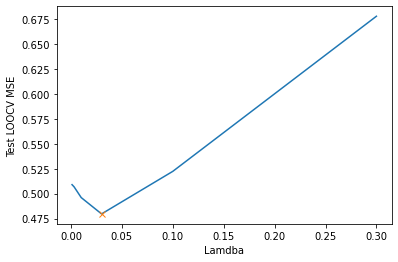

In [9]:
plt.plot(lam,score)
plt.plot(lam[np.argmin(score)],min(score), "x")
plt.ylabel("Test LOOCV MSE")
plt.xlabel("Lamdba")

In [10]:
learned_features = lasso_regression(X, y, lam=0.03)
nonzero_features = np.argwhere(~ np.isclose(learned_features, 0.)).squeeze()
print("index:", nonzero_features)
print("feature no. :", train_features[nonzero_features], "total:",len(nonzero_features))
print("coefficients:", learned_features[nonzero_features])

index: [ 0  1  3  9 10 11]
feature no. : [ 1  9 11 20 21 22] total: 6
coefficients: [ 0.41229806 -0.67706057  0.20655253  0.03608566  0.06103328 -0.00820271]


In [11]:
from sklearn.model_selection import KFold

In [13]:
kf = KFold(n_splits=10)
lam = [0.001,0.003,0.01,0.03,0.1,0.3]
mse_means = []
for x in lam:
    test_mse = []
    for train_index, test_index in kf.split(X):
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        lrnd_coefs = lasso_regression(X_train,y_train,lam=x)
        round_loss = mse_loss(X_test,y_test,lrnd_coefs)
        
        test_mse.append(round_loss)
        mean = np.mean(test_mse)
        
    mse_means.append(np.mean(mean))

print(dict(zip(lam , mse_means)))
print("Optimised Lambda {}, Mean MSE from 10-KFold Cross Validation {}".format(lam[np.argmin(mse_means)], np.min(mse_means)))

{0.001: 0.5342183866788701, 0.003: 0.5298277769392065, 0.01: 0.5235693219317692, 0.03: 0.5086957306239316, 0.1: 0.5274643488172248, 0.3: 0.6842525753928161}
Optimised Lambda 0.03, Mean MSE from 10-KFold Cross Validation 0.5086957306239316
